**Step 1 – Load & Inspect Data**

Load dataset, check shape, columns, datatypes, and a quick statistical summary.


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
df=pd.read_csv(r"D:\Karthik\OneDrive\Desktop\Technical training\screentime\Updated.csv")

In [25]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [27]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [28]:
df['Health_Impacts'] = df['Health_Impacts'].fillna('None')

In [29]:
df.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [30]:
df['Health_Impacts'].value_counts()

Health_Impacts
None                                             3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [31]:
df['Health_Impacts_List'] = df['Health_Impacts'].str.split(', ')
df_exploded = df.explode('Health_Impacts_List')
df_exploded

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Health_Impacts_List
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Eye Strain
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Poor Sleep
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Poor Sleep
3,15,Female,1.21,Laptop,False,0.39,None,Urban,None
...,...,...,...,...,...,...,...,...,...
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,Poor Sleep
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,Eye Strain
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,Anxiety
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,Poor Sleep


In [32]:
impact_by_device = df_exploded.groupby(['Primary_Device', 'Health_Impacts_List']).size().unstack().fillna(0)
impact_by_device 

Health_Impacts_List,Anxiety,Eye Strain,None,Obesity Risk,Poor Sleep
Primary_Device,,,,,
Laptop,280,396,380,175,791
Smartphone,743,1173,1470,612,2306
TV,389,546,904,287,1180
Tablet,193,267,464,143,591


In [33]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe(include='all'))

Shape: (9712, 9)

Data Types:
 Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
Health_Impacts_List                   object
dtype: object

Summary Stats:
                 Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9712.000000   9712               9712.000000           9712   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4942                       NaN           4568   
mean      12.979201    NaN                  4.352837            NaN   
std        3.162437    NaN                  1.718232            NaN   
min        8.000000    NaN          

In [34]:
# Gender distribution
df['Gender'].value_counts()

# Device usage by gender
df.groupby('Gender')['Primary_Device'].value_counts()

# Average screen time by age
df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()

# Health impacts by location
df_exploded.groupby('Urban_or_Rural')['Health_Impacts_List'].value_counts()


Urban_or_Rural  Health_Impacts_List
Rural           Poor Sleep             1429
                None                    962
                Eye Strain              694
                Anxiety                 483
                Obesity Risk            351
Urban           Poor Sleep             3439
                None                   2256
                Eye Strain             1688
                Anxiety                1122
                Obesity Risk            866
Name: count, dtype: int64

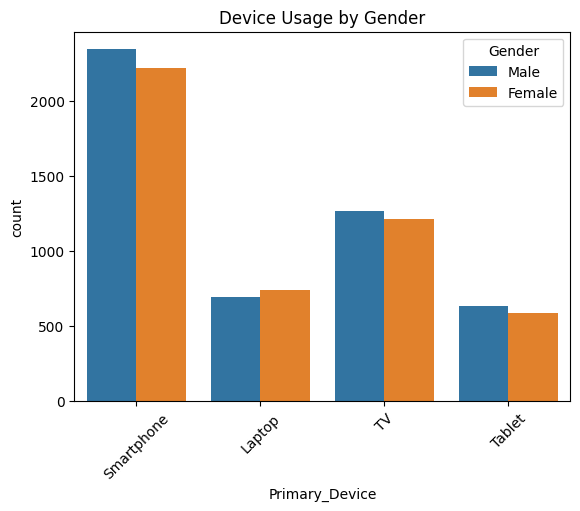

In [35]:
sns.countplot(data=df, x='Primary_Device', hue='Gender')
plt.title("Device Usage by Gender")
plt.xticks(rotation=45)
plt.show()

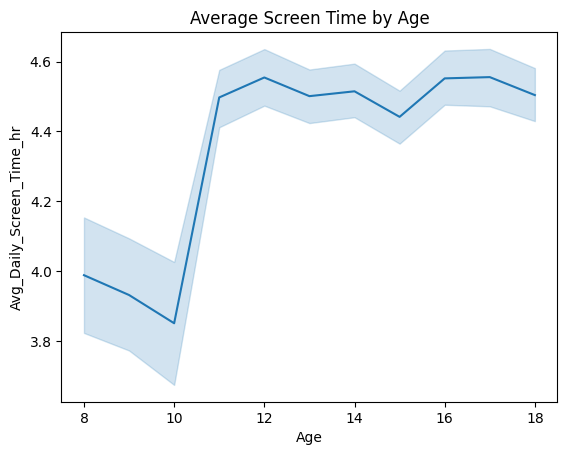

In [37]:
sns.lineplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr')
plt.title("Average Screen Time by Age")
plt.show()

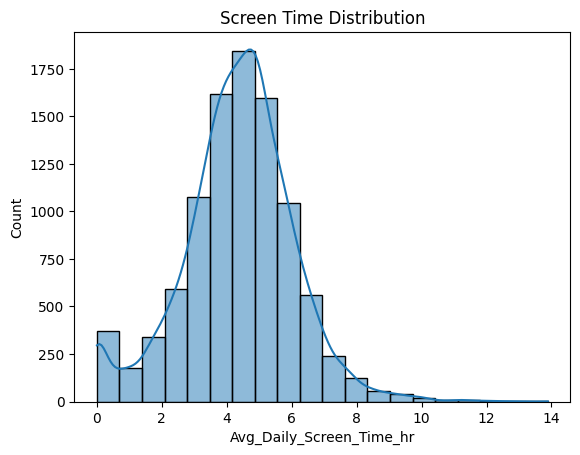

In [38]:
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20, kde=True)
plt.title("Screen Time Distribution")
plt.show()

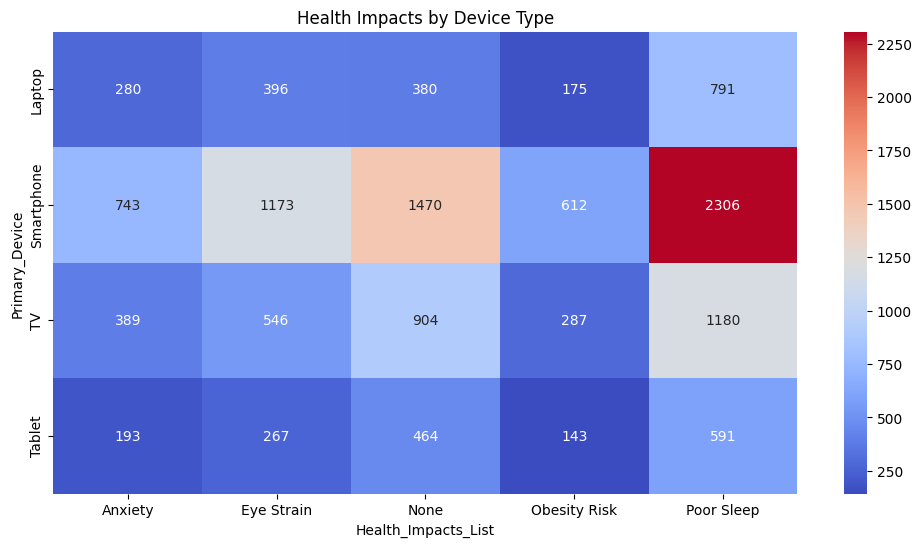

In [42]:
impact_by_device = df_exploded.groupby(['Primary_Device', 'Health_Impacts_List']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(impact_by_device, annot=True, fmt='g', cmap='coolwarm')
plt.title("Health Impacts by Device Type")
plt.show()


In [43]:
df.to_csv('python_updated.csv', index=False)